## Predicting the Critical Temperature of a Superconductor

My information
- Family Name: Manthatti
- Given Name: Srikar
- Email: srikarmanthatti@gmail.com

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- ggplot2
- reshape2
- stats
- scales
- grid
- gridExtra
- RColorBrewer
- ggExtra
- GGally
- glmnet
- leaps

## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

## 1. Introduction <a class="anchor" id="sec_1"></a>

We are given with a Supercondutor dataset which provides the information about the 8 different features. 
1. Atomic Mass
2. First Ionization Energy
3. Atomic Radius
4. Density
5. Electron Affinity
6. Fusion Heat
7. Thermal Conductivity
8. Valence

For each of the above mentioned properties we have provided with 10 different features such as Mean, Weighted mean, Geometric mean, Weighted geometric mean, Entropy, Weighted entropy, Range, Weighted range. Standard deviation, Weighted standard deviation. <br>
Our main aim in this is to predict the critical temperature of a material given all these properties and also to reduce the number of features, find the final subset of features which truly affects the critical temperature.

Name of the dataset provided: `train.csv`<br>
Number of predictors: `81` <br>
Target variable: `Critical Temperature`

In this task we will generate two or three models compare and analyse various statistical results between them.

**Background on Superconductivity**<br>
Here I will provide some background information on the terms which we will be using in the following analysis and model prediction<br>
`Supercondutor` is the material which can conduct the electricity with zero resistance<br>
`Critical Temperature` is the limiting temperature where a condutor turns into a supercondutor<br>
`Atomic Mass` It is the mass of protons and electrons of an element. <br>
`Density` This defines the solid ness of an element<br>
`Electron Affinity` is the amount energy released when an electron is added to a neutral atom<br>
`Fusion Heat` is the amount energy needed to melt the elements<br>
`First Ionization energy` is the amount of energy requires to remove the loosly connected electron<br>
`Thermal Conductivity` is the measure of an element conduting heat through it <br>
`Valence` is the total number of electrons that a element can loose <br>

The above provided background information can be used in the following sections while analysis the data and also to find the subsets of features.

## 2. Data Exploration<a class="anchor" id="sec_2"></a>

In this section we try to explore the given dataset and see what kind of statistical properties we have for the given data

#### Importing the required libraries

In [1]:
#install.packages('ggExtra')
#install.packages('GGally')
#install.packages("glmnet")
#install.packages('corrr')

In [2]:
library(ggplot2)
library(reshape2)
library(stats)
library(scales)
library(grid)
library(gridExtra)
library(RColorBrewer)
library(ggExtra)
library(GGally)
library(glmnet)
library(leaps)
#library(corrr)
options(warn=-1)

Warning message:
“package ‘gridExtra’ was built under R version 3.6.1”Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



#### Reading the train.csv file

In [3]:
superconductor <- read.csv("train.csv")
head(superconductor)

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.4330127,0.4370588,29
5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.6324555,0.4686063,26
4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.4330127,0.4446966,19
4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.4330127,0.4409521,22
4,88.94447,57.84014,66.36159,36.11072,1.181795,1.1292237,122.9061,27.84874,51.96883,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.4330127,0.4288095,23
4,88.94447,57.79504,66.36159,36.09893,1.181795,1.2252028,122.9061,20.68746,51.96883,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.4330127,0.4103259,23


In [4]:
dim(superconductor)

[1] 21263    82

For the given supercondutor dataset, we can see that the dimensions are 21263 * 82.

In [5]:
str(superconductor)

'data.frame':	21263 obs. of  82 variables:
 $ number_of_elements             : int  4 5 4 4 4 4 4 4 4 4 ...
 $ mean_atomic_mass               : num  88.9 92.7 88.9 88.9 88.9 ...
 $ wtd_mean_atomic_mass           : num  57.9 58.5 57.9 57.9 57.8 ...
 $ gmean_atomic_mass              : num  66.4 73.1 66.4 66.4 66.4 ...
 $ wtd_gmean_atomic_mass          : num  36.1 36.4 36.1 36.1 36.1 ...
 $ entropy_atomic_mass            : num  1.18 1.45 1.18 1.18 1.18 ...
 $ wtd_entropy_atomic_mass        : num  1.062 1.058 0.976 1.022 1.129 ...
 $ range_atomic_mass              : num  123 123 123 123 123 ...
 $ wtd_range_atomic_mass          : num  31.8 36.2 35.7 33.8 27.8 ...
 $ std_atomic_mass                : num  52 47.1 52 52 52 ...
 $ wtd_std_atomic_mass            : num  53.6 54 53.7 53.6 53.6 ...
 $ mean_fie                       : num  775 766 775 775 775 ...
 $ wtd_mean_fie                   : num  1010 1011 1011 1011 1010 ...
 $ gmean_fie                      : num  718 721 718 718 718 ...
 $

Only three variables  `number_of_elements`, `range_atomic_radius`, `range_Valence` are of integer type and all other variables are of numeric type.<br>
All values for the features are of continous.

#### Statistical summary of the variables for the given dataset

In [6]:
summary(superconductor)

 number_of_elements mean_atomic_mass  wtd_mean_atomic_mass gmean_atomic_mass
 Min.   :1.000      Min.   :  6.941   Min.   :  6.423      Min.   :  5.321  
 1st Qu.:3.000      1st Qu.: 72.458   1st Qu.: 52.144      1st Qu.: 58.041  
 Median :4.000      Median : 84.923   Median : 60.697      Median : 66.362  
 Mean   :4.115      Mean   : 87.558   Mean   : 72.988      Mean   : 71.291  
 3rd Qu.:5.000      3rd Qu.:100.404   3rd Qu.: 86.104      3rd Qu.: 78.117  
 Max.   :9.000      Max.   :208.980   Max.   :208.980      Max.   :208.980  
 wtd_gmean_atomic_mass entropy_atomic_mass wtd_entropy_atomic_mass
 Min.   :  1.961       Min.   :0.0000      Min.   :0.0000         
 1st Qu.: 35.249       1st Qu.:0.9667      1st Qu.:0.7754         
 Median : 39.918       Median :1.1995      Median :1.1468         
 Mean   : 58.540       Mean   :1.1656      Mean   :1.0639         
 3rd Qu.: 73.113       3rd Qu.:1.4445      3rd Qu.:1.3594         
 Max.   :208.980       Max.   :1.9838      Max.   :1.9582  

From the above summary, we can see that:
1. The minimum number of elements is 1, that means a element without combining with any other elements itselfs forms a super conductor.
2. The maximum number of elements which a supercondutor material consists of is 9 
3. The critical temperature for the elements ranges between 0.00021 to 185
4. For most of the properties which has features such as entropy, wtd_entropy, range, wtd_range, std,wtd_std has the minimum value **0.00**
5. All the features for valance property has **less range**, that means all elements of these supercondutor materials are ready to loose very less number of electrons from them
6. For all the properties the entropy feature range very less, it is between 0 and 2

### Checking the variance of all features.

In [7]:
sort(apply(superconductor[-82], 2, var))

wtd_entropy_ElectronAffinity wtd_entropy_ThermalConductivity 
                   8.178813e-02                    1.012820e-01 
            wtd_entropy_Density     entropy_ThermalConductivity 
                   1.022469e-01                    1.062605e-01 
                wtd_entropy_fie                 entropy_Density 
                   1.115677e-01                    1.172078e-01 
       entropy_ElectronAffinity             entropy_atomic_mass 
                   1.179175e-01                    1.331742e-01 
         wtd_entropy_FusionHeat           entropy_atomic_radius 
                   1.369923e-01                    1.409334e-01 
             entropy_FusionHeat             wtd_entropy_Valence 
                   1.413249e-01                    1.446209e-01 
                    entropy_fie                 entropy_Valence 
                   1.458740e-01                    1.545709e-01 
        wtd_entropy_atomic_mass       wtd_entropy_atomic_radius 
                   1.611408e-01                    1.657785e-01 
                wtd_std_Valence                     std_Valence 
                   2.075534e-01                    2.349111e-01 
              wtd_range_Valence                    mean_Valence 
                   9.568291e-01                    1.091213e+00 
                  gmean_Valence               wtd_gmean_Valence 
                   1.094654e+00                    1.380190e+00 
               wtd_mean_Valence                   range_Valence 
                   1.419073e+00                    1.543422e+00 
             number_of_elements              wtd_std_FusionHeat 
                   2.071569e+00                    5.311843e+01 
                 std_FusionHeat                gmean_FusionHeat 
                   7.519753e+01                    1.013224e+02 
                mean_FusionHeat            wtd_range_FusionHeat 
                   1.276942e+02                    1.302809e+02 
           wtd_gmean_FusionHeat             wtd_mean_FusionHeat 
                   1.725021e+02                    2.038994e+02 
            wtd_std_atomic_mass                 std_atomic_mass 
                   3.993420e+02                    4.014185e+02 
             mean_atomic_radius                range_FusionHeat 
                   4.059132e+02                    4.149621e+02 
       wtd_std_ElectronAffinity            std_ElectronAffinity 
                   4.173560e+02                    4.726502e+02 
            gmean_atomic_radius               std_atomic_radius 
                   4.880104e+02                    5.243365e+02 
          wtd_std_atomic_radius           wtd_range_atomic_mass 
                   6.398129e+02                    7.272596e+02 
          mean_ElectronAffinity      wtd_range_ElectronAffinity 
                   7.673947e+02                    8.191278e+02 
         wtd_mean_atomic_radius          gmean_ElectronAffinity 
                   8.295303e+02                    8.414307e+02 
               mean_atomic_mass               gmean_atomic_mass 
                   8.806945e+02                    9.628778e+02 
     wtd_gmean_ElectronAffinity       wtd_mean_ElectronAffinity 
                   1.001624e+03                    1.041765e+03 
           wtd_mean_atomic_mass       gmean_ThermalConductivity 
                   1.121607e+03                    1.160055e+03 
        wtd_range_atomic_radius         wtd_gmean_atomic_radius 
                   1.226355e+03                    1.284351e+03 
          wtd_gmean_atomic_mass        mean_ThermalConductivity 
                   1.343301e+03                    1.483597e+03 
  wtd_gmean_ThermalConductivity   wtd_range_ThermalConductivity 
                   1.615329e+03                    1.859620e+03 
   wtd_mean_ThermalConductivity               range_atomic_mass 
                   2.072003e+03                    2.984097e+03 
         range_ElectronAffinity         std_ThermalConductivity 
                   3.445728e+03       

We are applying the variance function to all the features in the given dataset. The 25 features of 81 has variance less than the 2. <br>
This means that the given data for these features doesnt vary much and have less uncertainity. Features which are very certain (less uncertainity) are not good for predictions.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


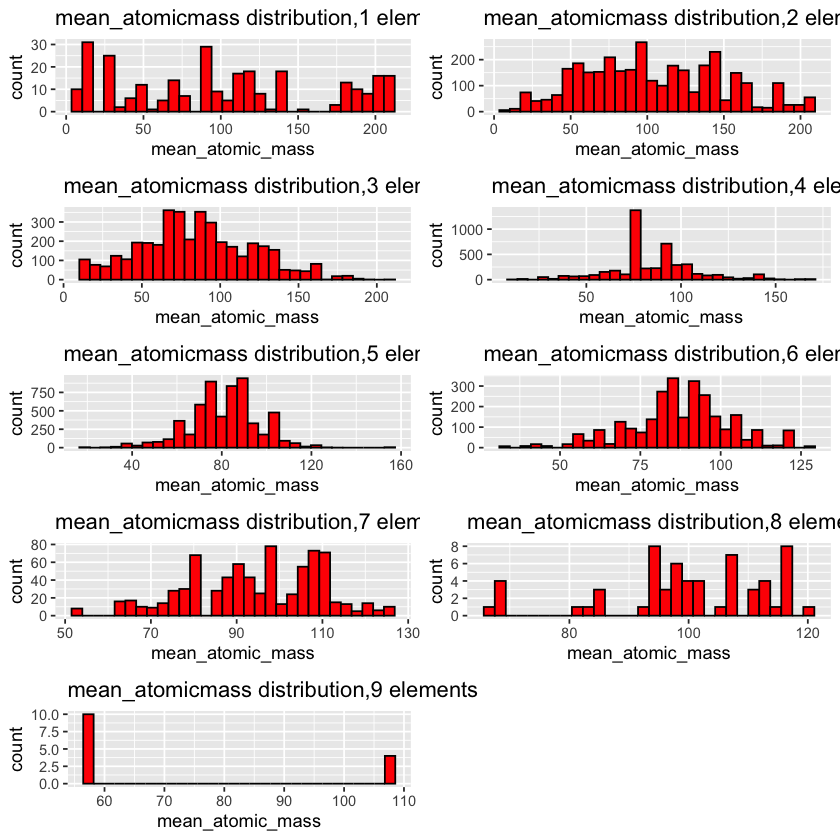

In [8]:
p1<-ggplot(aes(x=mean_atomic_mass), data =  subset(superconductor, number_of_elements == 1)) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('mean_atomicmass distribution,1 element')

p2<-ggplot(aes(x=mean_atomic_mass), data =  subset(superconductor, number_of_elements == 2)) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('mean_atomicmass distribution,2 elements')
p3<-ggplot(aes(x=mean_atomic_mass), data =  subset(superconductor, number_of_elements == 3)) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('mean_atomicmass distribution,3 elements')
p4<-ggplot(aes(x=mean_atomic_mass), data =  subset(superconductor, number_of_elements == 4)) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('mean_atomicmass distribution,4 elements')
p5<-ggplot(aes(x=mean_atomic_mass), data =  subset(superconductor, number_of_elements == 5)) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('mean_atomicmass distribution,5 elements')
p6<-ggplot(aes(x=mean_atomic_mass), data =  subset(superconductor, number_of_elements == 6)) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('mean_atomicmass distribution,6 elements')
p7<-ggplot(aes(x=mean_atomic_mass), data =  subset(superconductor, number_of_elements == 7)) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('mean_atomicmass distribution,7 elements')
p8<-ggplot(aes(x=mean_atomic_mass), data =  subset(superconductor, number_of_elements == 8)) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('mean_atomicmass distribution,8 elements')
p9<-ggplot(aes(x=mean_atomic_mass), data =  subset(superconductor, number_of_elements == 9)) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('mean_atomicmass distribution,9 elements')
# plot all 4, 2 x 2 

grid.arrange(p1, p2, p3, p4,p5,p6,p7,p8,p9, ncol = 2)

The following observations can be made from the above plot:
* For the materials with number of elements 3,5,6 the mean atomic distribution is normally distributed.
* For the number of element 9, we have almost 10 elements which have mean_atomic_mass distribution less than 60 that implies that for these materials most of the elements contributed are having less weights and they might be the starting 20 - 25 elements.

## Correlation 

### finding correlation between features

Creating a dataframe named `correlation` to store correlation between all 82 features and store it in a pairwise format.<br>
We are following a pairwise format since a correlation matrix of **82 * 82** would be very to interpret.<br>
The first and second columns are the feature columns and the third column is the correlation value between the first and second feature

In [9]:
#creating a dataframe to store correlation values
correlation <- data.frame(Feature1 = character(), Feature2 = character(), correlation_value = integer())#, P_val = integer())

Below is the for loop which extracts the correlation between each pair and stores it in the `correlation` dataframe

In [10]:
columns <- colnames(superconductor)
for (i in (1:length(columns))){
    #j = i+1
   
    for (j in (i+1:length(columns))){
        if (j > length(columns)){
            break
        }
        
        Feature1 <- columns[i]
        Feature2 <- columns[j]
        correlation_value <- (cor(superconductor[columns[i]],superconductor[columns[j]])[1])
        dummy <- data.frame(Feature1,Feature2,correlation_value)
        correlation <- rbind(correlation,dummy)       
    }   
}

In [11]:
print("Dimensions of the `correlation` dataframe are")
dim(correlation)

[1] "Dimensions of the `correlation` dataframe are"


[1] 3321    3

In [12]:
correlation

Feature1,Feature2,correlation_value
number_of_elements,mean_atomic_mass,-0.141922797
number_of_elements,wtd_mean_atomic_mass,-0.353064435
number_of_elements,gmean_atomic_mass,-0.292968819
number_of_elements,wtd_gmean_atomic_mass,-0.454525138
number_of_elements,entropy_atomic_mass,0.939304058
number_of_elements,wtd_entropy_atomic_mass,0.881845150
number_of_elements,range_atomic_mass,0.682777066
number_of_elements,wtd_range_atomic_mass,-0.320293446
number_of_elements,std_atomic_mass,0.513998153
number_of_elements,wtd_std_atomic_mass,0.546391203


### Finding correlation between features and the response variable


`correlation_relation` is the data frame that has pair wise correlation between the response variable and all the features

In [13]:
correlation_response <- data.frame(Feature1 = character(), Feature2 = character(), correlation_value = integer())#, P_val = integer())
for (j in (1:length(columns))){
 
        Feature1 <- columns[length(columns)]
        Feature2 <- columns[j]
        correlation_value <- (cor(superconductor[columns[length(columns)]],superconductor[columns[j]])[1])
        dummy <- data.frame(Feature1,Feature2,correlation_value)
        correlation_response <- rbind(correlation_response,dummy)       
    }   



In [14]:
print("Dimensions of the `correlation_response` dataframe are")
dim(correlation_response)

[1] "Dimensions of the `correlation_response` dataframe are"


[1] 82  3

In [15]:
correlation_response

Feature1,Feature2,correlation_value
critical_temp,number_of_elements,0.60106857
critical_temp,mean_atomic_mass,-0.11352325
critical_temp,wtd_mean_atomic_mass,-0.31227202
critical_temp,gmean_atomic_mass,-0.23034537
critical_temp,wtd_gmean_atomic_mass,-0.36985838
critical_temp,entropy_atomic_mass,0.54361941
critical_temp,wtd_entropy_atomic_mass,0.62693040
critical_temp,range_atomic_mass,0.49196981
critical_temp,wtd_range_atomic_mass,-0.33713139
critical_temp,std_atomic_mass,0.37876583


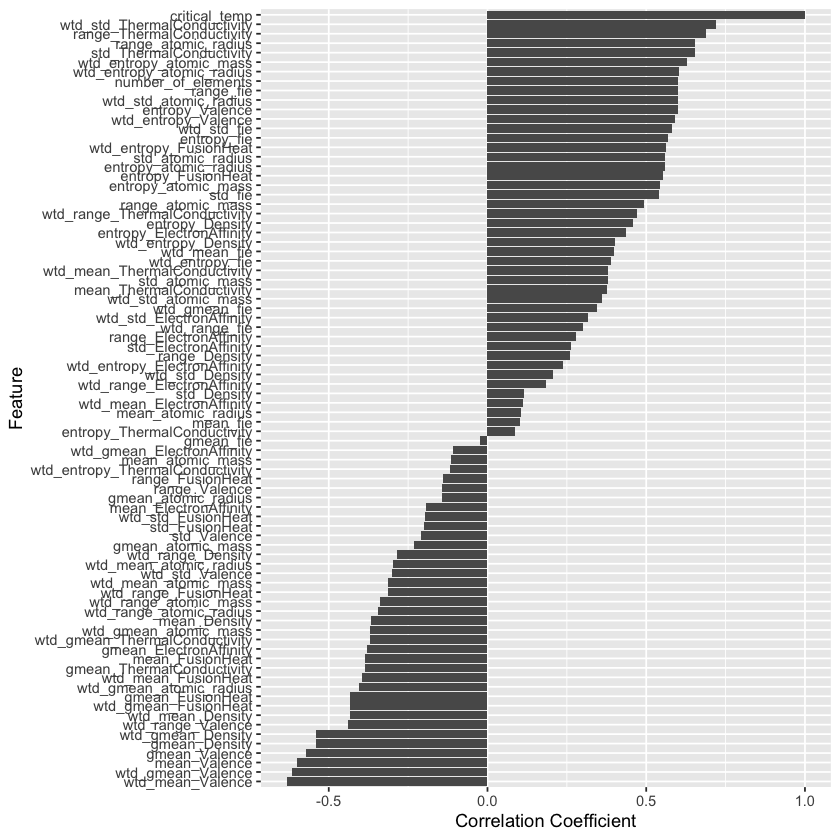

In [16]:
correlation_response_sort <-correlation_response[order(correlation_response$correlation_value),]
ggplot(correlation_response_sort, aes(x = factor(Feature2, levels = Feature2), y = correlation_value)) + 
    geom_bar(stat = "identity") + 
    coord_flip() + 
    xlab("Feature") + 
    ylab("Correlation Coefficient")

From the above plot we can see that `wtd_std_thermal_conductivity` is **highly correlated** with the `response variable`<br>
Most weakly positive correlation is between `entropy_thermal_conductivity` and `critical temperature` <br>
Most weakly negative correlation is between `gmean_fie` and `critical temperature`<br>
Strong negative correlation is between `wtd_mean_valence` and `critical_temperature`<br>

wtd_mean_valence( `(p1t1) + (p2t2)`) is the property which tells us about how many electrons that an element ready to use, this property is highly negatively correlated with respect to the critical temperature because if an element has very high number electrons to loose then it needs less critical temprature to become a supercondutor as it is ready to lose the electrons.<br>
If you check most the features of the `valence property`, they all are **negatively correlated with critical temperature** because valence property tells that element is ready to loose the electron ***(provided in background information in Introduction part)***<br>


For the `Density` property we can see that the features related to mean are negatively correlated with the critical temperature. This is interesting as the name suggests Density defines how dense our element if it is more dense then it might have more critical temperature, but here the case is in **reverse format**.

Except `gmean_fie` all other features related to `fie` property are positively correlated with respect to the critical temperature. That means critical temperature increases as the amount the energy required to remove the electron increases.


As the `number of elements` of a material increases the `critical temperature` threshold is also increasing. This is because materials with many elements are more complex than the materials with the less elements


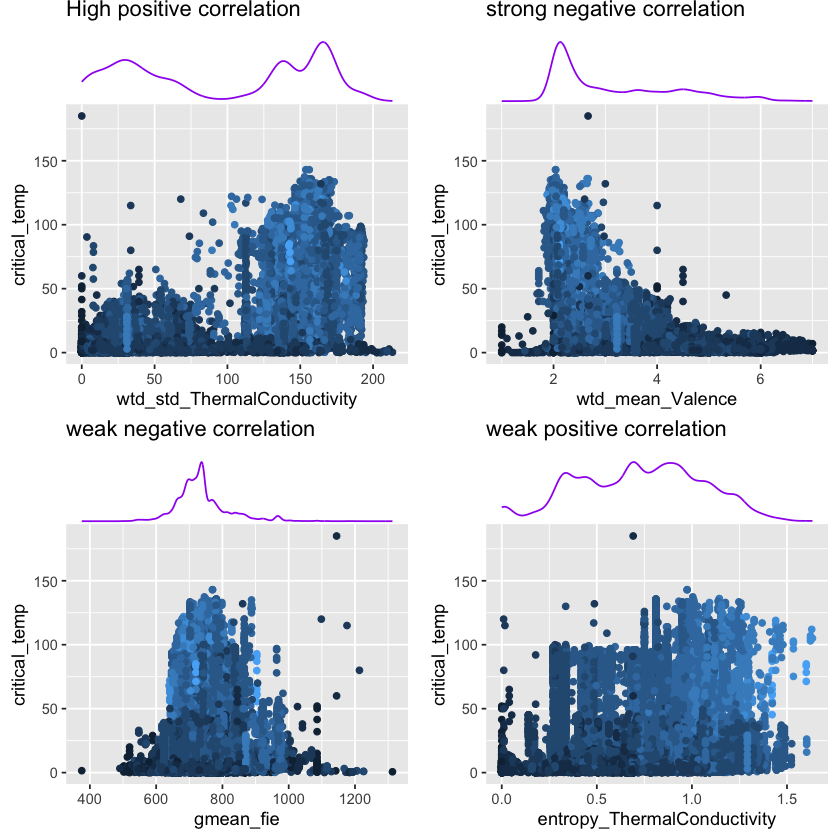

In [17]:
p1 <- ggplot(superconductor, aes(x=wtd_std_ThermalConductivity, y=critical_temp, color=number_of_elements)) +
      geom_point() +theme(legend.position="none") +
     ggtitle("High positive correlation")
p11 <- ggMarginal(p1, margins = 'x',color="purple", size=4)

p2 <- ggplot(superconductor, aes(x=wtd_mean_Valence, y=critical_temp, color=number_of_elements)) +
      geom_point() +
      theme(legend.position="none") +  ggtitle("strong negative correlation")
p22<- ggMarginal(p2, margins = 'x', color="purple", size=4)

p3 <- ggplot(superconductor, aes(x=gmean_fie, y=critical_temp, color=number_of_elements)) +
      geom_point() +theme(legend.position="none") +
      ggtitle("weak negative correlation")
p33 <- ggMarginal(p3, margins = 'x',color="purple", size=4)

p4 <- ggplot(superconductor, aes(x=entropy_ThermalConductivity, y=critical_temp, color=number_of_elements)) +
      geom_point() +
      theme(legend.position="none") + ggtitle("weak positive correlation")
p44<- ggMarginal(p4, margins = 'x', color="purple", size=4)

grid.arrange(p11, p22, p33,p44, ncol = 2)

In the above plots, it is clearly demonstrated how th distribution of highly positive correlated, strong negative correlated, weak negative correlated and weak positive correlation features with respect to critical temperature

### Checking mean_valence and other property mean features

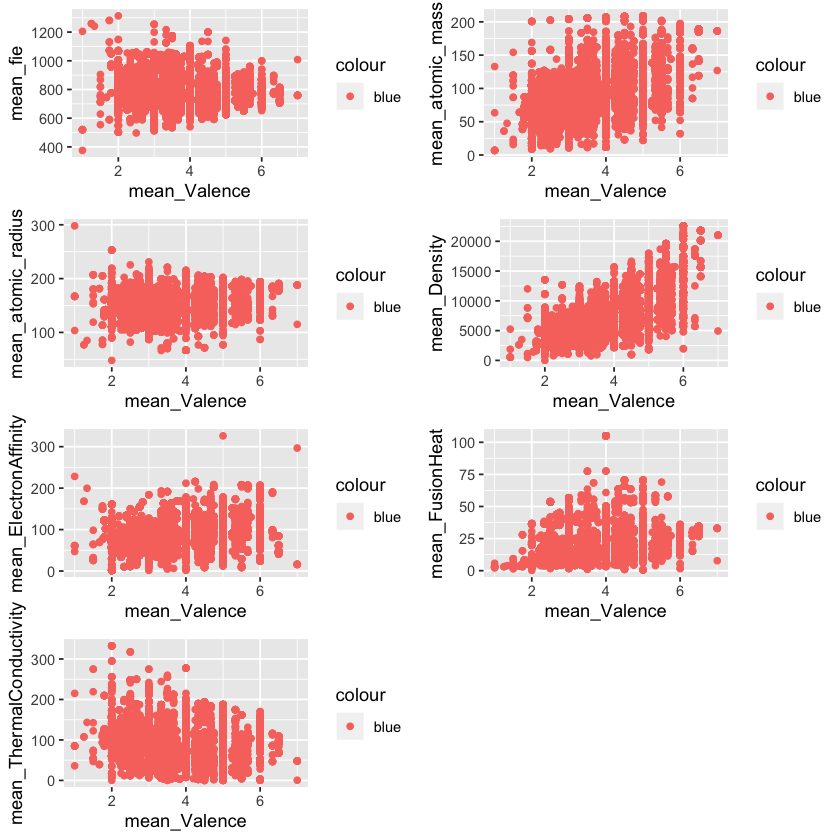

In [18]:
p1 <- ggplot(superconductor,aes(x=mean_Valence, y=mean_fie)) + geom_point(aes(color = "blue"))
p2 <- ggplot(superconductor,aes(x=mean_Valence, y=mean_atomic_mass)) + geom_point(aes(color = "blue"))
p3 <- ggplot(superconductor,aes(x=mean_Valence, y=mean_atomic_radius)) + geom_point(aes(color = "blue"))
p4 <- ggplot(superconductor,aes(x=mean_Valence, y=mean_Density)) + geom_point(aes(color = "blue"))
p5 <- ggplot(superconductor,aes(x=mean_Valence, y=mean_ElectronAffinity)) + geom_point(aes(color = "blue"))
p6 <- ggplot(superconductor,aes(x=mean_Valence, y=mean_FusionHeat)) + geom_point(aes(color = "blue"))
p7 <- ggplot(superconductor,aes(x=mean_Valence, y=mean_ThermalConductivity)) + geom_point(aes(color = "blue"))


grid.arrange(p1,p2,p3,p4,p5,p6,p7, ncol = 2)


* From the above plots we can see that as mean_valence increases mean_density and mean_atomic mass is also increasing, this is quite often and expected.<br>
* If you check the graph between the mean_fusionHeat and mean_valence it forms in normal distribution. Itseems if the mean_valence is greater than 3 and less than 5 then a lot amount of energy is need to remove the elements. When the mean_valence increases the mean_fusionHeat is decreasing. This might be ofas the number of electrons that can be easily removed is high then it is easy to remove those.<br>
* For almost all other properties it is normally correlated

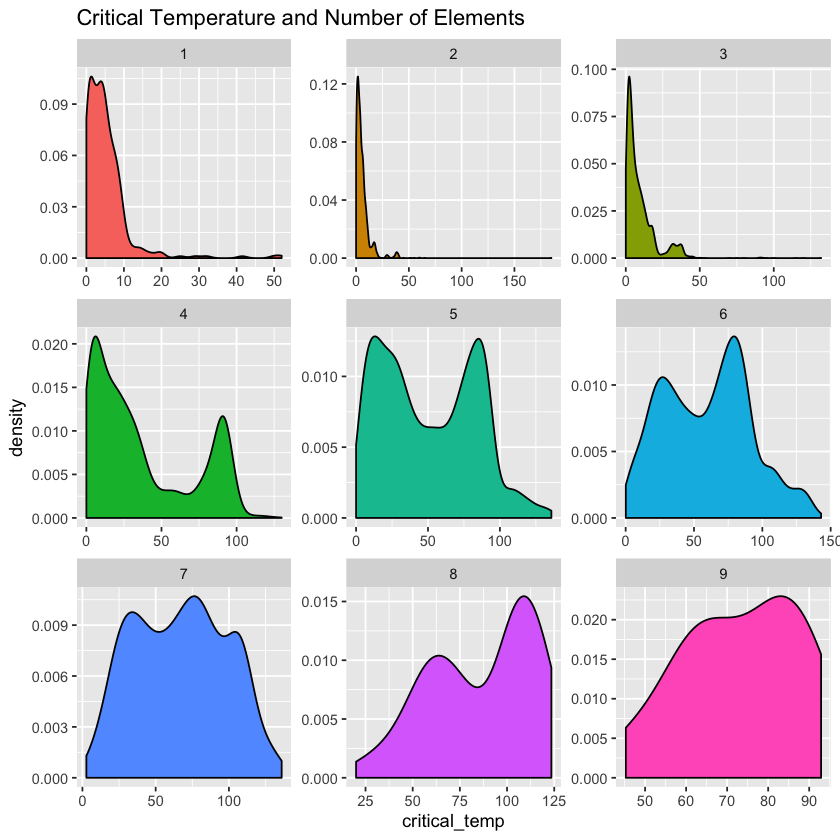

In [19]:
ggplot(aes(x=critical_temp),data = superconductor) + 
    geom_density(aes(fill = as.factor(number_of_elements))) +
    ggtitle('Critical Temperature and Number of Elements') +
    scale_fill_discrete(guide="none") + facet_wrap(~number_of_elements, scale = 'free')

In the above plot you can clearly see how the critical temperature density is varying with respect to number of elements. For number of elements 1,2,3 the most of the density is skewed right side, for `1` the critical temperature mostly varies from `0 - 20` and for `2, 3` it varies from `0-50`. <br>
For the materials with number of elements `4,5,6`, the critical temperature is in bimodal distribution.<br>
For the materials with number of elements `7,9`, it seems that the critical temperature is almost guassianly distributed.


## Dimensionality reduction by removing the features which are highly correlated to each other

### Scaling the data

In [20]:
summary(superconductor)

 number_of_elements mean_atomic_mass  wtd_mean_atomic_mass gmean_atomic_mass
 Min.   :1.000      Min.   :  6.941   Min.   :  6.423      Min.   :  5.321  
 1st Qu.:3.000      1st Qu.: 72.458   1st Qu.: 52.144      1st Qu.: 58.041  
 Median :4.000      Median : 84.923   Median : 60.697      Median : 66.362  
 Mean   :4.115      Mean   : 87.558   Mean   : 72.988      Mean   : 71.291  
 3rd Qu.:5.000      3rd Qu.:100.404   3rd Qu.: 86.104      3rd Qu.: 78.117  
 Max.   :9.000      Max.   :208.980   Max.   :208.980      Max.   :208.980  
 wtd_gmean_atomic_mass entropy_atomic_mass wtd_entropy_atomic_mass
 Min.   :  1.961       Min.   :0.0000      Min.   :0.0000         
 1st Qu.: 35.249       1st Qu.:0.9667      1st Qu.:0.7754         
 Median : 39.918       Median :1.1995      Median :1.1468         
 Mean   : 58.540       Mean   :1.1656      Mean   :1.0639         
 3rd Qu.: 73.113       3rd Qu.:1.4445      3rd Qu.:1.3594         
 Max.   :208.980       Max.   :1.9838      Max.   :1.9582  

Since all the features have different scale in our dataset, here we are standardizing the data using Z normalization by considering the mean as 0 and standard deviation as 1

### Standardizing the data 

In [21]:
scale_fun <- function(x){
    val <- (x-mean(x))/sd(x)
    return (val)
}

Creating a new dataframe named `scaled_superconductor` with the scale data.

In [22]:
scaled_superconductor = superconductor

for (i in 1:81)
{
  scaled_superconductor[,i] = scale_fun(scaled_superconductor[,i])
}

### Filter method<br>



### By considering the correlation

**Correlation between the features** should be `less`, so that there will be `more uncertainity` which is very useful for predicting the target variable.<br>
**Correlation between the feature and the target variable** should be `more`, so that by knowing the value of the features we can accurately predict the target variable.<br>

Since there are many features which are highly correlated. I am selecting 0.8 as the threshold for removing the features, if x1 and x2 having a correlation of 0.8 then if any value which differs by one standard deviation will on average differ in x2 by 0.8 of its standard deviation. Since we have many datapoints for training, values different by 0.8 will not much affect the prediction

In [23]:
new_df <- subset(correlation, abs(correlation_value) > 0.8 )
dim(new_df)

[1] 159   3

In [24]:
new_df

,Feature1,Feature2,correlation_value
5,number_of_elements,entropy_atomic_mass,0.9393041
6,number_of_elements,wtd_entropy_atomic_mass,0.8818452
15,number_of_elements,entropy_fie,0.9731953
25,number_of_elements,entropy_atomic_radius,0.9722452
26,number_of_elements,wtd_entropy_atomic_radius,0.9041207
35,number_of_elements,entropy_Density,0.8718317
45,number_of_elements,entropy_ElectronAffinity,0.8773040
55,number_of_elements,entropy_FusionHeat,0.9007593
56,number_of_elements,wtd_entropy_FusionHeat,0.8604788
75,number_of_elements,entropy_Valence,0.9678325


If you check the above data of the features which have very high absolute correlation, we can see that most of the similar properties with different features.

`unique features` are the different predictors that are highly correlated to each other and thus removing them from the given dataset and creating a new dataframe named `new_supercondutor_df`

In [25]:
unique_features <- unique(new_df[['Feature2']])
new_superconductor_df <- scaled_superconductor[-c(unique_features)]

In [26]:
dim(new_superconductor_df)


[1] 21263    28

#### The dimensions of the new dataframe are **21263 * 28**. We have removed 54 features which are highly correlated to each other

### Correlation plot between feature reduction (filter by correlation)

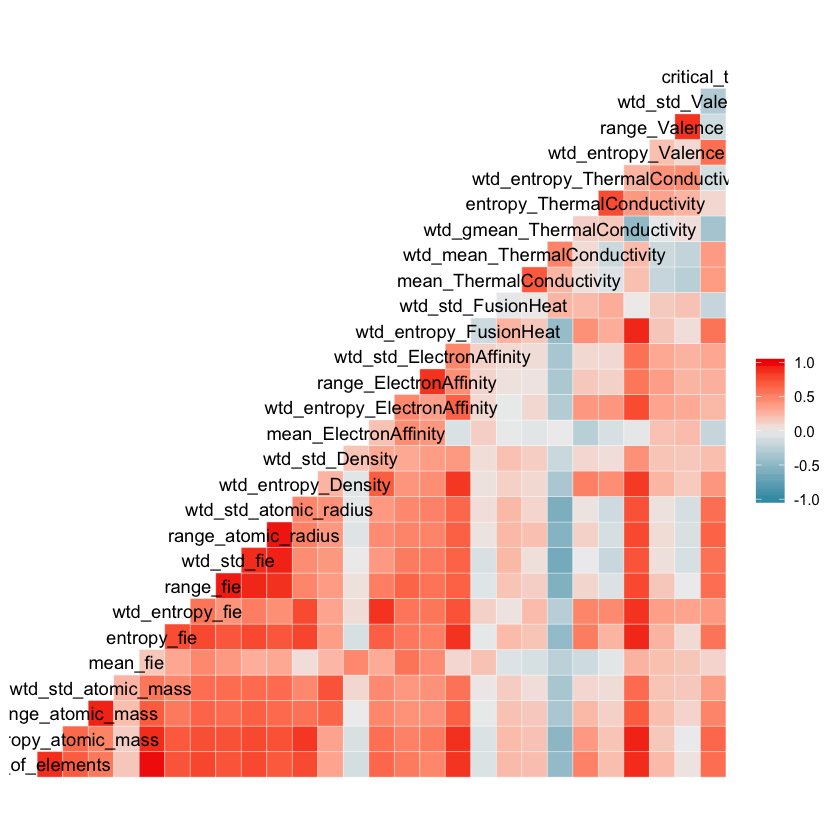

In [27]:
#ggpairs(new_superconductor_df, title="correlogram with ggpairs()")
#plot(new_superconductor_df , pch=20 , cex=1.5 , col="#69b3a2")
ggcorr(new_superconductor_df, method = c("everything", "pearson"))

### Finding correlation between reduced features and the response variable


`new_correlation_response` is the data frame that has pair wise correlation between the response variable and all the features

In [28]:
new_columns <- colnames(new_superconductor_df)
new_correlation_response <- data.frame(Feature1 = character(), Feature2 = character(), correlation_value = integer())#, P_val = integer())
for (j in (1:length(new_columns))){
 
        Feature1 <- new_columns[length(new_columns)]
        Feature2 <- new_columns[j]
        correlation_value <- (cor(new_superconductor_df[new_columns[length(new_columns)]],new_superconductor_df[new_columns[j]])[1])
        dummy <- data.frame(Feature1,Feature2,correlation_value)
        new_correlation_response <- rbind(new_correlation_response,dummy)       
    }   

In [29]:
dim(new_correlation_response)

[1] 28  3

The `correlation_response` and `new_correlation_response` dataframes will have same correlation values for the features against response variable. Just making sure that we are storing in different dataframe for future purpose

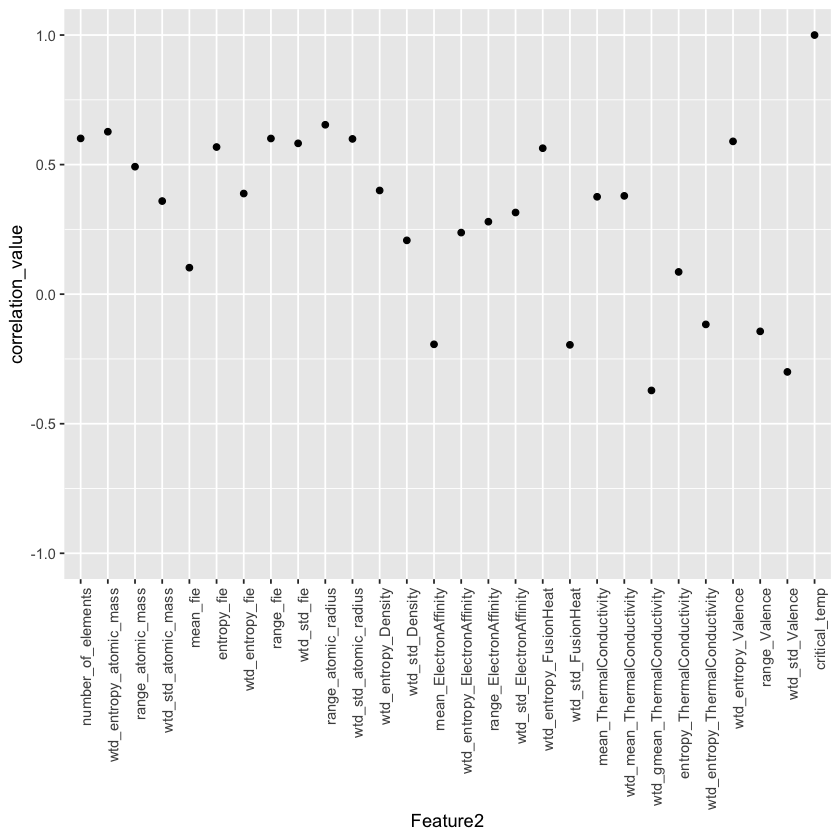

In [30]:
ggplot(new_correlation_response,aes(x = Feature2, y=correlation_value))+geom_point()+ theme(axis.text.x = element_text(angle = 90, hjust = 1)) + scale_y_continuous(limits = c(-1, +1))

From the above plot we can see that three features are very less correlated with the response variable `critical temperature`.<br>
The three less correlated features are <br>
1. mean_fie
2. mean_atomic_radius
3. entropy_thermal_conductivity
4. wtd_entropy_ThermalConductivity
5. range_Valence

Since we always consider highly correlated features to predict the response variables we can remove these variables.

In [31]:
new_df <- subset(new_correlation_response, abs(correlation_value) < 0.2 )
dim(new_df)

[1] 6 3

In [32]:
unique_features <- unique(new_df[['Feature2']])
new_superconductor_df <- new_superconductor_df[-c(unique_features)]
dim(new_superconductor_df)

[1] 21263    22

In [33]:
#library(dplyr)
#new_superconductor_df <- select(new_superconductor_df,-mean_fie,-mean_atomic_radius, -entropy_ThermalConductivity,-range_Valence,-wtd_entropy_ThermalConductivity)
#dim(new_superconductor_df)

### Correlation between all variables

corrplot 0.84 loaded


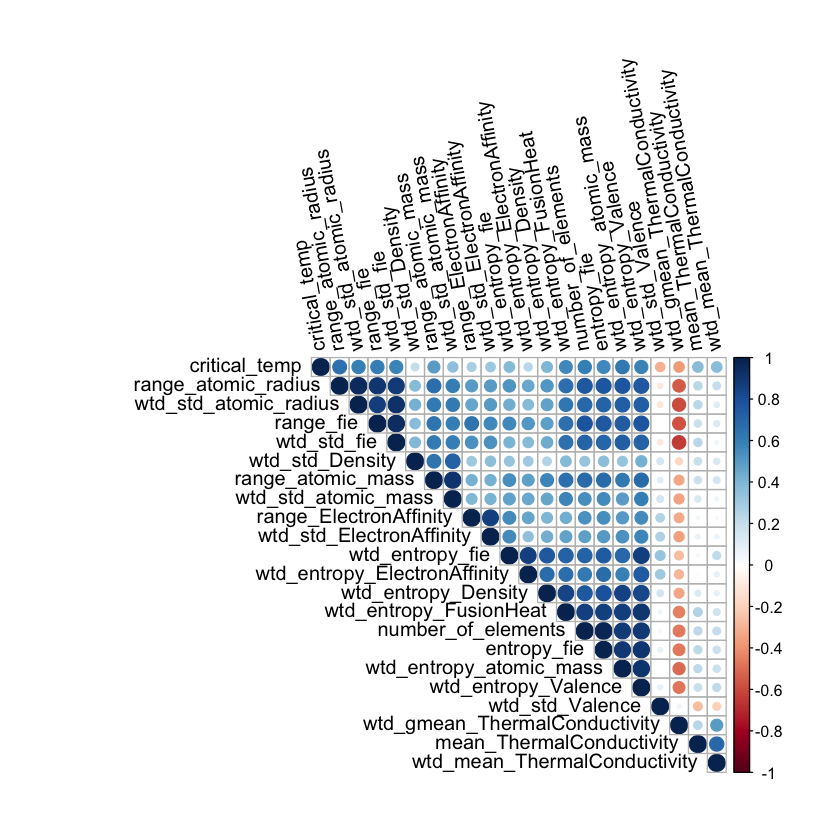

In [34]:
new_cor_matrix <- cor(new_superconductor_df)
library(corrplot)
corrplot(new_cor_matrix, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 100)

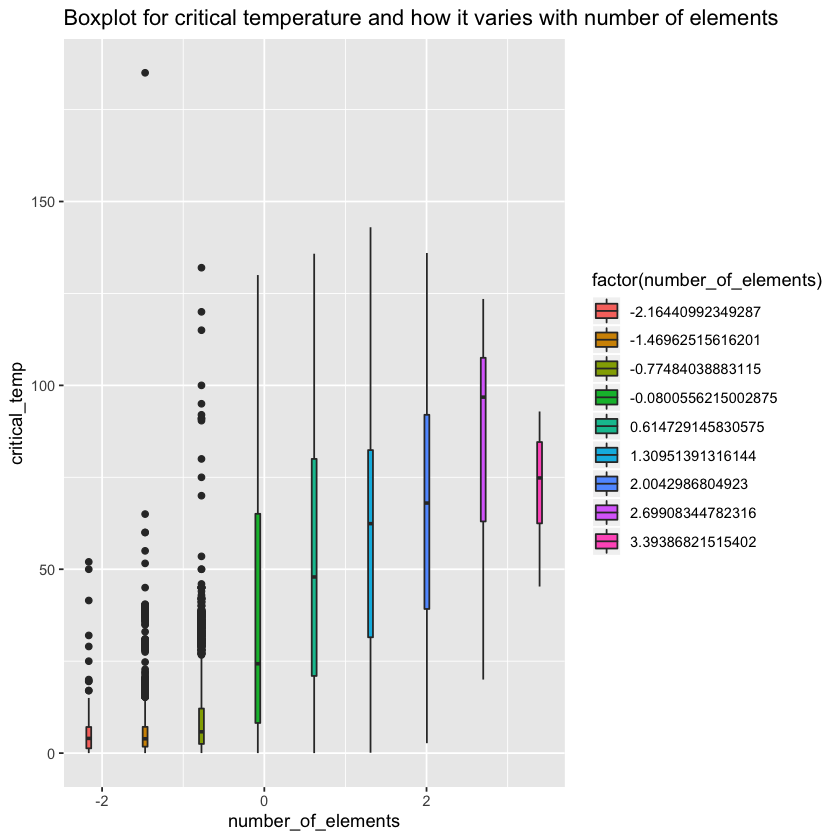

In [35]:

ggplot(new_superconductor_df,aes(x =number_of_elements, y=critical_temp, fill=factor(number_of_elements))) +
  geom_boxplot() + ggtitle("Boxplot for critical temperature and how it varies with number of elements") 
#ggplot(new_superconductor_df, aes(y=critical_temp)) + 
 #   geom_boxplot() 


The following observations are made from the above boxplot
* For number of elements = 1,2,3, the average value of the critical temperaute is very less and close to zero. That means material with one, two, three elements in it can become a super conductor easily when cooled.
* We can also see that few materials with one, two and three elements need a large temperature to become a super conductor
* If you check the pattern, whenever the number of elements is increasing the critical temperature is also increasing. 


In [36]:
#par(mfrow = c(2,4)) # 6 x 2 grid
#for (i in 1:(length(normalized_superconductor) - 1)) {
 #       boxplot(normalized_superconductor[,i], main = names(normalized_superconductor[i]), type="l", col = 'lightblue') # I like blue
#}

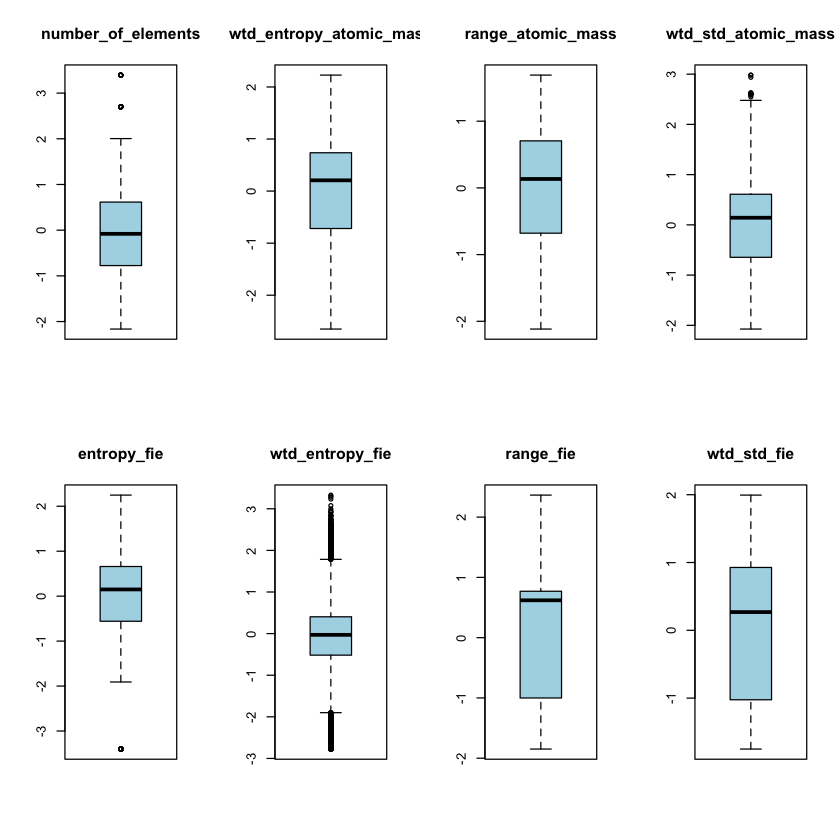

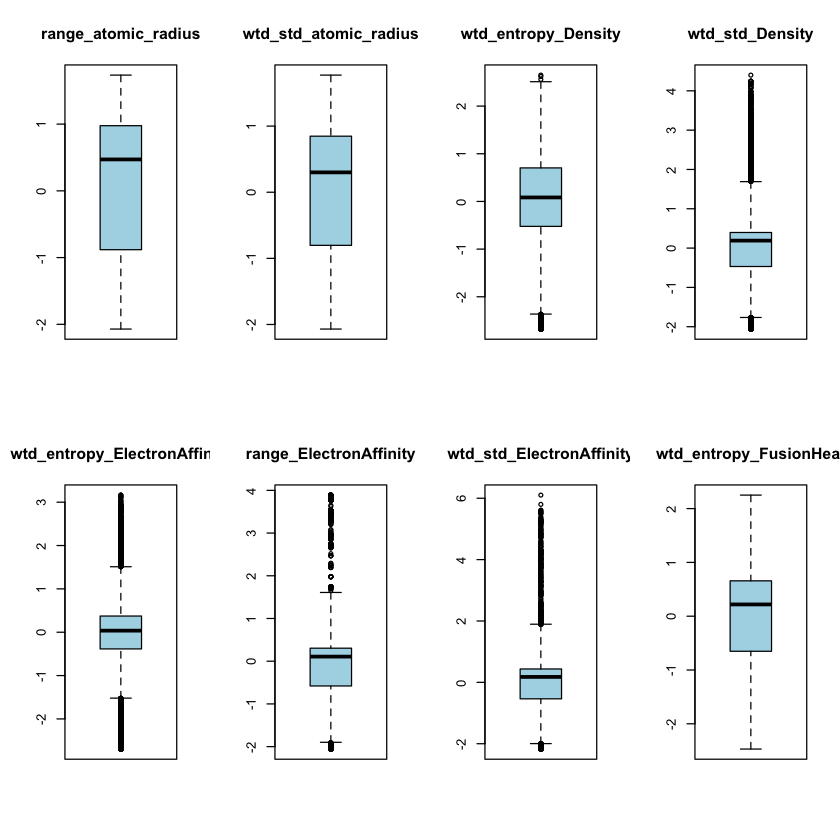

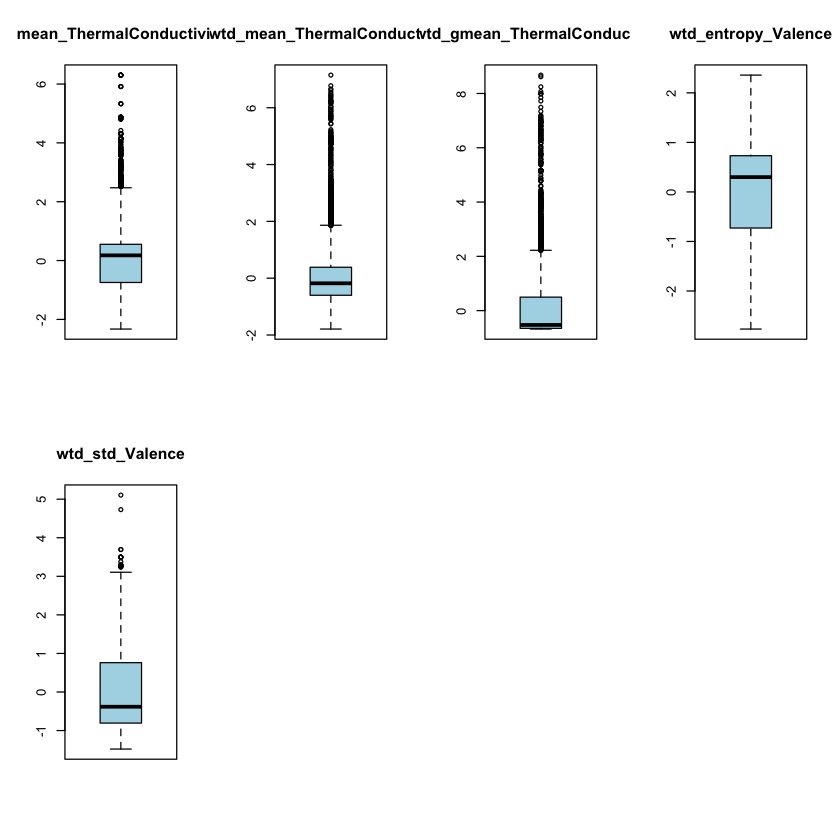

In [37]:
par(mfrow = c(2,4)) # 6 x 2 grid
for (i in 1:(length(new_superconductor_df) - 1)) {
        boxplot(new_superconductor_df[,i], main = names(new_superconductor_df[i]), type="l", col = 'lightblue') # I like blue
}

## 3. Model Development<a class="anchor" id="sec_3"></a>

### Splitting the data into training and testing data

As we have only one file with 21263 rows, we are trying to split the given file into two files `training_data` which has `80%` of data from the initial file. And the remaining `20%` is saved into the `testing_data`.<br>
The purpose of **training data** is to train the model to predict the `Critical Temperature` of the superconductor.<br>
The purpose of **testing data** is to test the model which is trained and check whether the prediction is correct or not.

If you check the summary of the linear model, there are few statistics that will explain you about the accuracy of the model.<br>
`Estimate` is the value of each parameter with respect to that feature<br>
`Std.Error` it is the standard deviation of the sampling distribution of the estimate<br>
`t-value` is the statistic which tells us whether the estimate of that feature is different from zero<br>
`Pr(>|t|)` it tells you about the probablity of a t statistic. If it is a less than the signficant value then we have a strong evidence against the null hypothesis saying that the coefficient or the estimate of that feature is not zero. Based on this there are few significance codes which are placed beside each feature and tells you the most significant one.<br>
`Residual standard error`tells us that how close our fit model is to the data.<br>
`Multiple R-Squared` it is the proportion of variance of the data given by the model.<br>
`Adjusted R-Square` this penalizes somes of the features and then calculate the R-Square value.<br>
`F-statistic` tells us whether our model as a whole is performing better or not by considering the features that we given. <br>
`p-value` gives the probability on the F-statistic.<br>

### Model1: Model with all features

In the first model, I am considering all features which where given in the dataset

In [38]:
smp_size <- floor(0.80 * nrow(scaled_superconductor))
set.seed(123)
train_ind <- sample(seq_len(nrow(scaled_superconductor)), size = smp_size ) #Generating the 80% indexes from the main file.
training_data_full <- scaled_superconductor[train_ind,] #copying the 80% of sampled data from the main file to the training_data
testing_data_full <- scaled_superconductor[-train_ind,] #copying the remaining 20% of the data into the testing_data
print(dim(training_data_full))
print(dim(testing_data_full))

[1] 17010    82
[1] 4253   82


In [39]:
fit1 <- lm(critical_temp ~ ., data=training_data_full)

In [40]:
summary(fit1)


Call:
lm(formula = critical_temp ~ ., data = training_data_full)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.978  -9.355   0.560  10.920 170.378 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      34.4052     0.1349 255.100  < 2e-16 ***
number_of_elements               -4.8793     1.2014  -4.061 4.90e-05 ***
mean_atomic_mass                 24.8780     2.7415   9.075  < 2e-16 ***
wtd_mean_atomic_mass            -29.0930     3.8674  -7.523 5.64e-14 ***
gmean_atomic_mass               -14.7114     2.8415  -5.177 2.28e-07 ***
wtd_gmean_atomic_mass            21.5778     4.0154   5.374 7.81e-08 ***
entropy_atomic_mass             -14.3565     1.8681  -7.685 1.61e-14 ***
wtd_entropy_atomic_mass           2.5799     1.6246   1.588 0.112306    
range_atomic_mass                12.3876     1.0063  12.310  < 2e-16 ***
wtd_range_atomic_mass             0.9950     0.6663   1.493 0.135381    
std_atomic_mass       

With all the features considering and creating a model we have got an R-squared value as 73.75 and adjusted R-squared is 73.62 (which is obtained by penalizing the intependent terms in the features.) 

### Calculating the mean square error

In [41]:
full_pred  <-predict(fit1, testing_data_full)
full_features_mse<-mean( (testing_data_full$critical_temp-full_pred)^2 )
fit1_aic <- AIC(fit1)


In [42]:
full_features_mse

[1] 312.5944

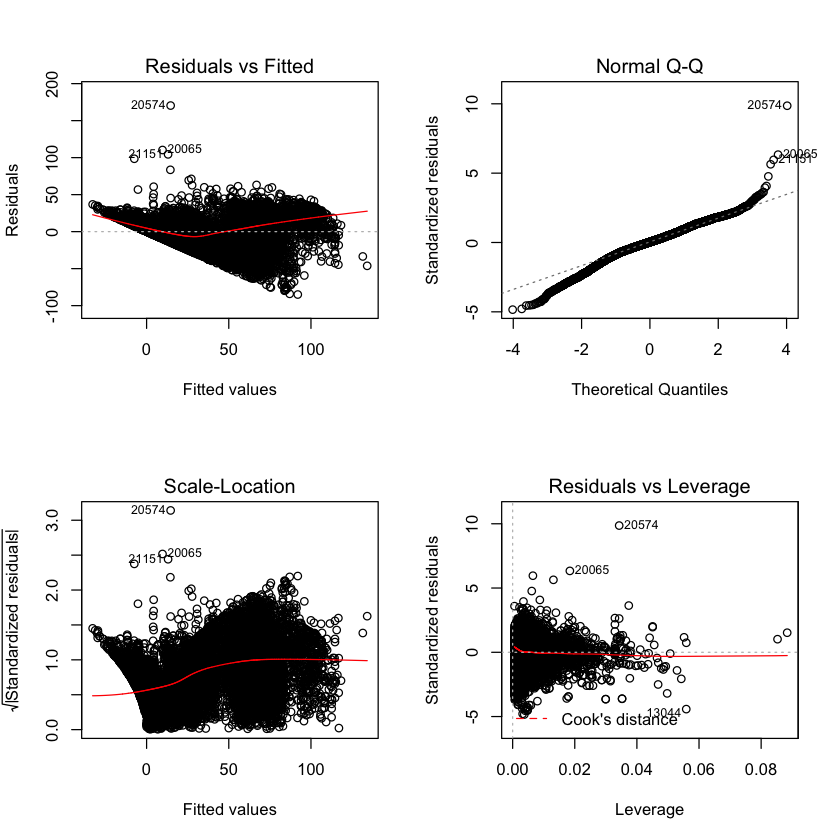

In [43]:
par(mfrow=c(2,2))
plot(fit1)

The model plots show:
- **Residual vs Fitted** - shows the residuals very lessly distributed around zero, but they funnel out as the fitted value increases. This model violates the assumption of homoscedasticity - the error terms change along the regression line
- **Normal Q-Q** - the residuals deviate significantly from the dashed line, indicating the residuals are not normally distributed
- **Scale-Location** - The chart shows the model violates the assumption of equal variance
- **Residuals vs Leverage** - The chart shows there are some possibly outliers, but as they are close to the mean of the distribution they are not much influencetial.

### Model2: Model with only 22 features

In the second model am considering the features which have been extracted from the data analysis performed in the section. Below are the list of features we have in this model `'number_of_elements' 'wtd_entropy_atomic_mass' 'range_atomic_mass' 'wtd_std_atomic_mass' 'entropy_fie' 'wtd_entropy_fie' 'range_fie' 'wtd_std_fie' 'range_atomic_radius' 'wtd_std_atomic_radius' 'wtd_entropy_Density' 'wtd_std_Density' 'wtd_entropy_ElectronAffinity' 'range_ElectronAffinity' 'wtd_std_ElectronAffinity' 'wtd_entropy_FusionHeat' 'mean_ThermalConductivity' 'wtd_mean_ThermalConductivity' 'wtd_gmean_ThermalConductivity' 'wtd_entropy_Valence' 'wtd_std_Valence' 'critical_temp'`


In [44]:
smp_size <- floor(0.80 * nrow(new_superconductor_df))
set.seed(123)
train_ind <- sample(seq_len(nrow(new_superconductor_df)), size = smp_size ) #Generating the 80% indexes from the main file.
training_data <- new_superconductor_df[train_ind,] #copying the 80% of sampled data from the main file to the training_data
testing_data <- new_superconductor_df[-train_ind,] #copying the remaining 20% of the data into the testing_data
print(dim(training_data))
print(dim(testing_data))

[1] 17010    22
[1] 4253   22


The dimensions of training_data is 17010 * 22
The dimensions of testing_data is 4253 * 22

In [45]:
fit2 <- lm(critical_temp ~ ., data=training_data)

In [46]:
summary(fit2)


Call:
lm(formula = critical_temp ~ ., data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.486 -11.959  -0.272  12.374 208.418 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    34.3732     0.1485 231.503  < 2e-16 ***
number_of_elements              2.1656     0.7763   2.790  0.00528 ** 
wtd_entropy_atomic_mass        12.1865     0.6489  18.780  < 2e-16 ***
range_atomic_mass              14.6461     0.5030  29.115  < 2e-16 ***
wtd_std_atomic_mass            -7.6804     0.5309 -14.468  < 2e-16 ***
entropy_fie                    -9.6221     0.7944 -12.113  < 2e-16 ***
wtd_entropy_fie                14.3583     0.6819  21.057  < 2e-16 ***
range_fie                      10.0731     1.0783   9.342  < 2e-16 ***
wtd_std_fie                   -12.2017     1.0712 -11.391  < 2e-16 ***
range_atomic_radius            -1.2061     0.9679  -1.246  0.21274    
wtd_std_atomic_radius           8.0465     0.9372

With all the features considering and creating a model we have got an R-squared value as 68.05 and adjusted R-squared is 68.01 (which is obtained by penalizing the intependent terms in the features.) 

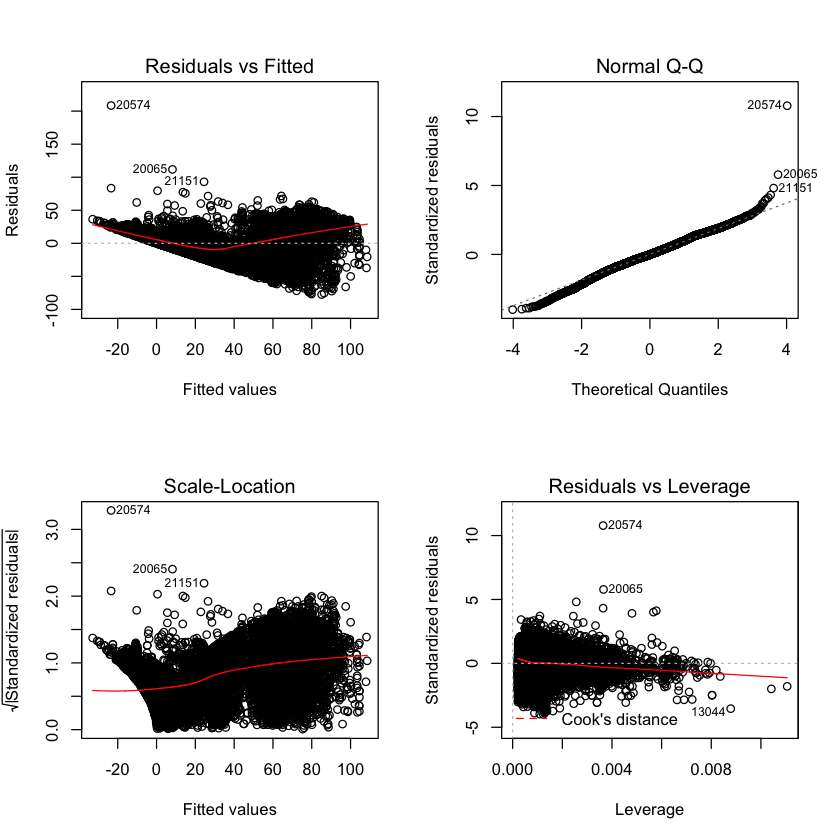

In [47]:
par(mfrow=c(2,2))
plot(fit2)

The model plots show:
- **Residual vs Fitted** - shows the residuals very lessly distributed around zero, but they funnel out as the fitted value increases. This model violates the assumption of homoscedasticity - the error terms change along the regression line
- **Normal Q-Q** - on the starting and ending of the points the residuals are deviating slightly, but we can see that it almost follows the guassian distribution
- **Scale-Location** - The chart shows the model violates the assumption of equal variance
- **Residuals vs Leverage** - The chart shows there are some possibly outliers, but as they are close to the mean of the distribution they are not much influencetial.

In [48]:
reduced_pred  <-predict(fit2, testing_data)
reduced_features_mse<-mean( (testing_data$critical_temp-reduced_pred)^2 )
fit2_aic <- AIC(fit2)

### Calculating the mean square error

In [49]:
reduced_features_mse

[1] 380.1787

## Model 3 Perform stepwise selection

One drawback of best subset selection is its time complexity. In general, the number of models that you need to fit is $2^p$, which is infeasible if $p$ is large, for example, if $p =10$. It also easily results in a model that fits the training data perfectly but performing badly on unseen data. In this section, we are going to explore alternative methods, known as stepwise selection, which explore a far more restricted set of models. There are three stepwise selection methods:
* <b>Forward stepwise selection</b>: Starts with one-variable models, gradually add one variable, end with a model including all the specified variables.
* <b>Backward stepwise selection</b>: Starts with a full model, gradually exclude one variable, end with one-variable models.

We begin with forward stepwise selection. It is very easy to implement the forward stepwise selection method with <font color="blue">regsubsets()</font>: 

### Forward stepwise selection

Here in the forward stepwise selection we are taking all 81 features that needs to be checked and creating the regsubset from those predictors.

In [50]:
regfit.fwd <- regsubsets(critical_temp ~ ., data = training_data_full, nvmax = 81, method = "forward")
reg.summary.fwd <- summary(regfit.fwd)


In the above summary the symbol astreick indicates that the particular corresponding feature is used in creating that model.<br>
For the above obtained summary which is stored in `reg.summary.fwd`, we extract the metrics such as BIC, AIC(C_P), Adjusted R Square, RSS and plot them with respect to the number of variables that are being selected for a model and plot them accordingly.

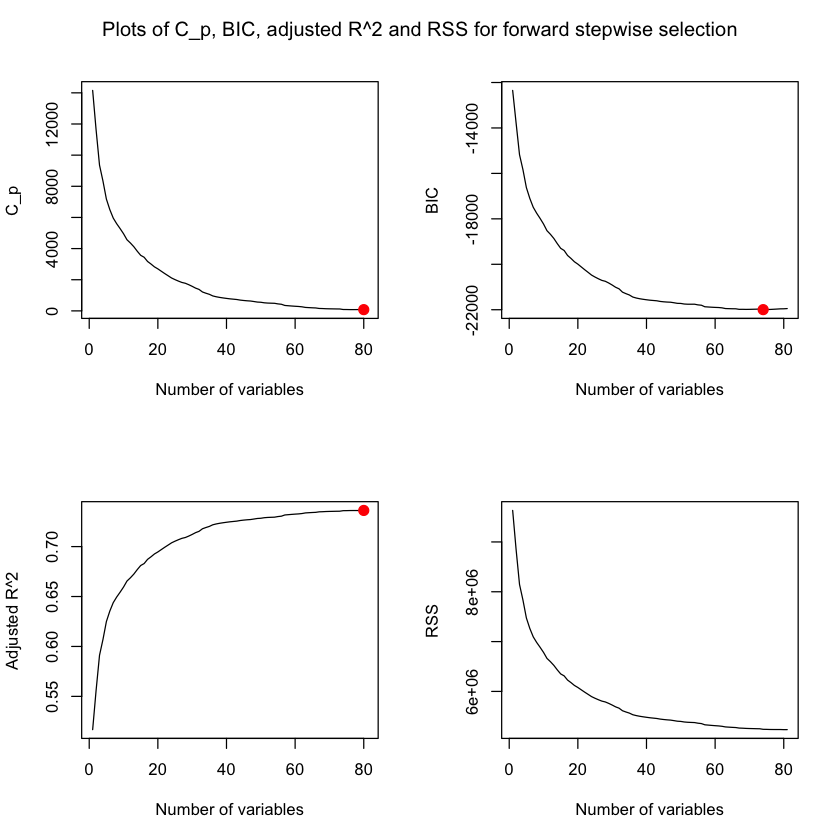

In [51]:
par(mfrow = c(2, 2))
plot(reg.summary.fwd$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary.fwd$cp), reg.summary.fwd$cp[which.min(reg.summary.fwd$cp)], col = "red", cex = 2, pch = 20)
plot(reg.summary.fwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary.fwd$bic), reg.summary.fwd$bic[which.min(reg.summary.fwd$bic)], col = "red", cex = 2, pch = 20)
plot(reg.summary.fwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary.fwd$adjr2), reg.summary.fwd$adjr2[which.max(reg.summary.fwd$adjr2)], col = "red", cex = 2, pch = 20)
plot(reg.summary.fwd$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for forward stepwise selection", side = 3, line = -2, outer = TRUE)

From the above we can see that for C_p, Adjusted R^2 we see that they are having optimal value when the number of features for predictors are almost 80 which is equal to our intial number of parameters. <br>
For the BIC curve we get the optimal value for the number of variables around 75. To get the exact optimal number of variables we are using the minimum funcion in the below chunk.<br>
From the above we are choosing the number of variables which is being shown by the **bic curve**. Because BIC(Bayesian Information Criterion) always considers the posterior probability that the model being true and the BIC penalizes the model complexcity more heavily. As BIC and AIC both are trade off between the goodness of fit and model complexcity, we are considering the the metric which gives the best optimal fit value with less model complxcity.

In [52]:
which.min(reg.summary.fwd$bic)  # the minimum of number of variables that has been choosen by the BIC

[1] 74

Below is the part where we are extracting the features that has been selected in forward stepwise and creating a model with respect to those features

In [53]:
val <- rownames(as.data.frame(coef(regfit.fwd, 74))) #extracting the feature names from the summary
features_through_fwd <- val[-1] # removing the intercept term from the summary
#features_through_fwd
features_through_fwd <- c(features_through_fwd, 'critical_temp') #appending the response variable critical temperature to the column name before splitting the data
training_data_full_fwd <- training_data_full[,c(features_through_fwd)] # creating a training dataset with the stepwise forward features
testing_data_full_fwd <- testing_data_full[,c(features_through_fwd)]# creating a testing dataset with the stepwise forward features

In [54]:
fit_fwd <- lm(critical_temp~., data = training_data_full_fwd)
summary(fit_fwd)


Call:
lm(formula = critical_temp ~ ., data = training_data_full_fwd)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.736  -9.287   0.549  10.802 169.642 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      34.4039     0.1349 254.990  < 2e-16 ***
number_of_elements               -4.2887     1.1790  -3.638 0.000276 ***
mean_atomic_mass                 23.1327     2.6867   8.610  < 2e-16 ***
wtd_mean_atomic_mass            -26.3437     3.7748  -6.979 3.09e-12 ***
gmean_atomic_mass               -12.9540     2.7609  -4.692 2.73e-06 ***
wtd_gmean_atomic_mass            18.6264     3.8599   4.826 1.41e-06 ***
entropy_atomic_mass             -14.6195     1.8346  -7.969 1.70e-15 ***
wtd_entropy_atomic_mass           2.2624     1.5724   1.439 0.150224    
range_atomic_mass                12.1957     0.9944  12.264  < 2e-16 ***
wtd_range_atomic_mass             0.9501     0.5023   1.891 0.058591 .  
std_atomic_mass   

With all the features considering and creating a model we have got an R-squared value as 73.71 and adjusted R-squared is 73.6 (which is obtained by penalizing the intependent terms in the features.) 

### Calculating the mean square error

In [55]:
reduced_fwd  <-predict(fit_fwd, testing_data_full_fwd)
stepfwd_features_mse<-mean( (testing_data$critical_temp-reduced_fwd)^2 )
reduced_fwd_aic <- AIC(fit_fwd)
stepfwd_features_mse

[1] 312.8431

### Backward stepwise selection

In [56]:
regfit.bwd <- regsubsets(critical_temp ~ ., data = training_data_full, nvmax = 81, method = "backward")
reg.summary.bwd <- summary(regfit.bwd)


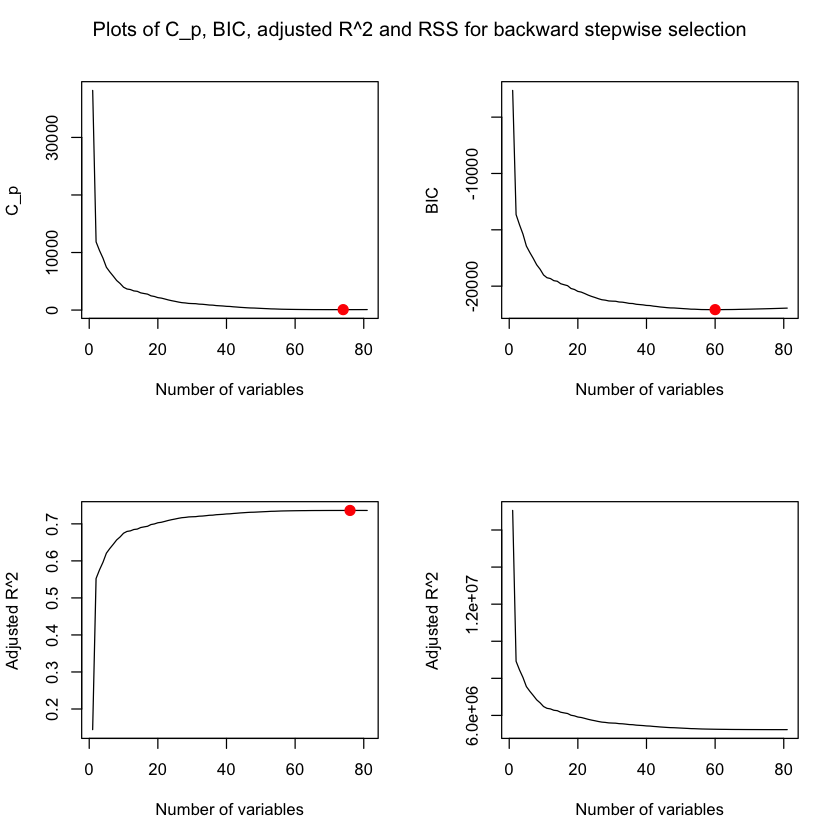

In [57]:
par(mfrow = c(2, 2))
plot(reg.summary.bwd$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary.bwd$cp), reg.summary.bwd$cp[which.min(reg.summary.bwd$cp)], col = "red", cex = 2, pch = 20)
plot(reg.summary.bwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary.bwd$bic), reg.summary.bwd$bic[which.min(reg.summary.bwd$bic)], col = "red", cex = 2, pch = 20)
plot(reg.summary.bwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary.bwd$adjr2), reg.summary.bwd$adjr2[which.max(reg.summary.bwd$adjr2)], col = "red", cex = 2, pch = 20)
plot(reg.summary.bwd$rss, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for backward stepwise selection", side = 3, line = -2, outer = TRUE)

From the above we can see that for C_p, Adjusted R^2 we see that they are having optimal value when the number of features for predictors are almost 80 which is equal to our intial number of parameters. <br>
For the BIC curve we get the optimal value for the number of variables around **60**. To get the exact optimal number of variables we are using the minimum funcion in the below chunk.<br>
From the above we are choosing the number of variables which is being shown by the **bic curve**. Because BIC(Bayesian Information Criterion) always considers the posterior probability that the model being true and the BIC penalizes the model complexcity more heavily. As BIC and AIC both are trade off between the goodness of fit and model complexcity, we are considering the the metric which gives the best optimal fit value with less model complxcity.

In [58]:
which.min(reg.summary.bwd$bic)  # taking the minimum number of variables that were choosen by the bic

[1] 60

In [59]:
val <- rownames(as.data.frame(coef(regfit.bwd, 60))) ##extracting the feature names from the summary
features_through_bwd <- val[-1] # removing the intercept term form the names which has been extacted from the summary of the backward selection
features_through_bwd <- c(features_through_bwd, 'critical_temp') #appendign the critical temperature response variable before we extract and split the training and testign data
training_data_full_bwd <- training_data_full[,c(features_through_bwd)] #extracting the training data
testing_data_full_bwd <- testing_data_full[,c(features_through_bwd)] #extracting the testing data

In [60]:
fit_bwd <- lm(critical_temp~., data = training_data_full_bwd)
summary(fit_bwd)


Call:
lm(formula = critical_temp ~ ., data = training_data_full_bwd)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.145  -9.397   0.589  10.951 171.720 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    34.4032     0.1350 254.748  < 2e-16 ***
number_of_elements             -5.2238     1.1457  -4.560 5.16e-06 ***
mean_atomic_mass               22.2144     1.8607  11.939  < 2e-16 ***
wtd_mean_atomic_mass          -24.9890     1.8868 -13.244  < 2e-16 ***
gmean_atomic_mass             -11.5920     2.0091  -5.770 8.08e-09 ***
wtd_gmean_atomic_mass          16.9594     2.2142   7.660 1.97e-14 ***
entropy_atomic_mass           -13.0332     1.5590  -8.360  < 2e-16 ***
range_atomic_mass              11.9931     0.9750  12.301  < 2e-16 ***
std_atomic_mass               -10.0366     0.9634 -10.418  < 2e-16 ***
mean_fie                       19.5892     3.8839   5.044 4.61e-07 ***
wtd_mean_fie                  -34.4619  

With all the features considering and creating a model we have got an R-squared value as 73.64 and adjusted R-squared is 73.54 (which is obtained by penalizing the intependent terms in the features.) 

### Calculating the mean square error

In [61]:
reduced_bwd  <-predict(fit_bwd, testing_data_full_bwd)
stepbwd_features_mse<-mean( (testing_data$critical_temp-reduced_bwd)^2 )
reduced_bwd_aic <- AIC(fit_bwd)
stepbwd_features_mse

[1] 314.0366

### Model 4: Lasso Regression Regularization



In this section, we are creating the model by using the L1 regularization (Lasso regression). An inbuilt packages named `glmnet` which implements various regularisers (e.g. $\ell_1$, $\ell_2$, and a combination of the two which is called the "elastic net")is used to do regularization, and study its output.   


The `glmnet` function has several interesting input arguments and output values. In particular, we use `alpha` to select the type of regularization (`0`:Ridge and `1`:LASSO) and `lambda` to set a range for the regularization parameter. Some of the interesting outputs are `a0`, `beta` and `df` indicating the intercept, coefficients and the number of nonzero coefficients, respectively

In [62]:
#converting the training and testing data into the matrix
train.mat <- model.matrix(critical_temp ~ ., data = training_data_full)[,-1] 
test.mat <- model.matrix(critical_temp ~ ., data = testing_data_full)[,-1]

In [63]:
grid <- 10^seq(4, -2, length = 100)

In [64]:
set.seed(1)# the purpose of fixing the seed of the random number generator is to make the result repeatable.
fit.lasso <- glmnet(train.mat, training_data_full$critical_temp, lambda = grid,alpha = 1, thresh = 1e-12)
cv.lasso <- cv.glmnet(train.mat, training_data_full$critical_temp, lambda = grid,alpha = 1,  thresh = 1e-12)
bestlam.lasso <- cv.lasso$lambda.min # from the cross validation done above we are taking the best lambda with which we can train our model
bestlam.lasso

[1] 0.0231013

In [65]:
pred.lasso <- predict(fit.lasso, s = bestlam.lasso, newx = test.mat)
pred.lasso.mse <- mean((pred.lasso -testing_data_full$critical_temp)^2)

List of coeffiecients that were selected based on the Lasso regression

In [66]:
predict(fit.lasso, s = bestlam.lasso, type = "coefficients")

82 x 1 sparse Matrix of class "dgCMatrix"
                                          1
(Intercept)                      34.3967382
number_of_elements               -3.9178438
mean_atomic_mass                  7.5922408
wtd_mean_atomic_mass             -5.9973107
gmean_atomic_mass                 .        
wtd_gmean_atomic_mass             .        
entropy_atomic_mass              -8.4381101
wtd_entropy_atomic_mass           3.8075789
range_atomic_mass                 9.3285368
wtd_range_atomic_mass             .        
std_atomic_mass                  -2.0100878
wtd_std_atomic_mass              -4.8350003
mean_fie                          0.5447022
wtd_mean_fie                      2.1763903
gmean_fie                         .        
wtd_gmean_fie                     .        
entropy_fie                       .        
wtd_entropy_fie                   7.1259883
range_fie                        16.2364013
wtd_range_fie                     3.8697616
std_fie                         -1

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

In the above section [Model Development](#sec_3), i have developed the following models.
1. fit1 : linear model with all features
2. fit2 : linear model with 20 features
3. fit_fwd : linear model, features selected by doing stepwise forward
4. fit_bwd : linear model, features selected by doing stepwise backward
5. fit.lasso : linear model with Lasso regulariation

### 1. Results of Linear model with 81 features

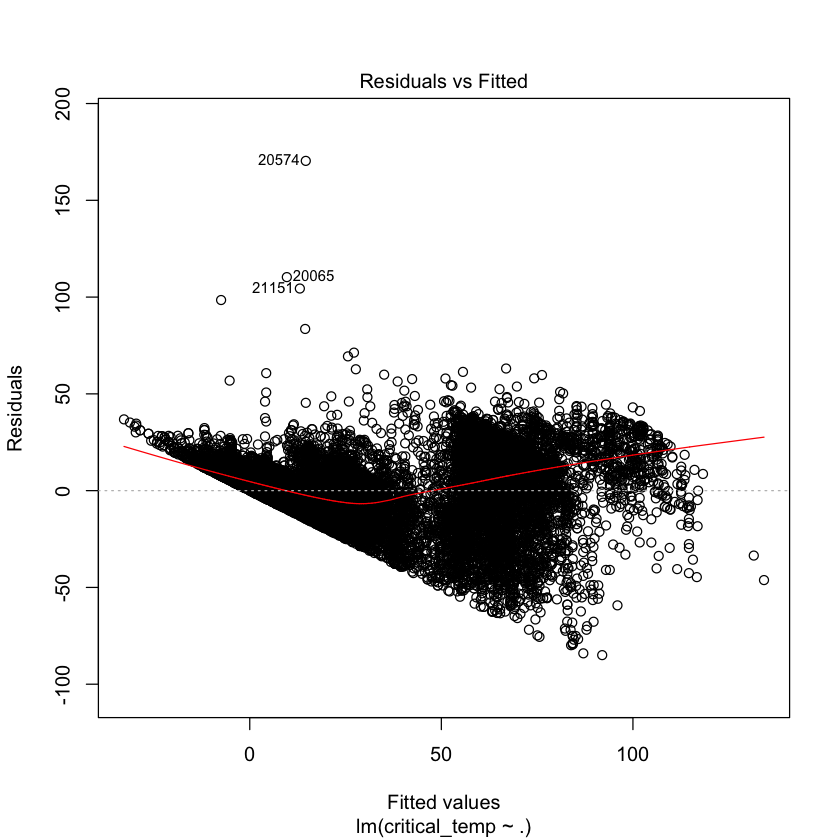

In [67]:
plot(fit1, which = 1)

The above plot shows the residuals very lessly distributed around zero, but they funnel out as the fitted value increases. This model violates the assumption of homoscedasticity - the error terms change along the regression line

### 2. Results of Linear model with 22 features

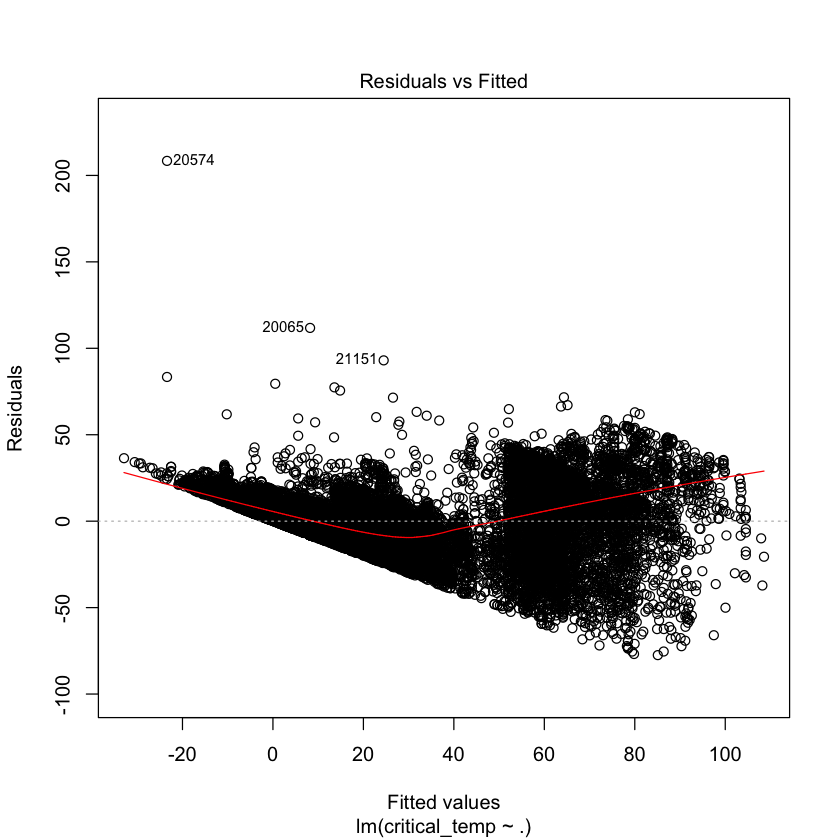

In [68]:
plot(fit2, which = 1)

The above plot shows the residuals very lessly distributed around zero, and also we can see that the fitted values are being started from -20 which very less when compared to the given critical temperature minimum value. The residuals funnel out as the fitted value increases. This model violates the assumption of homoscedasticity - the error terms change along the regression line.

## Comparing the models fit1 and fit2

Here we are using `anova` testing for comparing the two models. Anova testing simply calculates the change in deviance between the two models. In our case we are comparing two models and our null hypothesis is that both models that are being compared are statistically same. So after performing the anova test we get a probability of `F statistic`. <br>
`F-statistic` is a ratio of two quantities that are expected to be roughly equal under the null hypothesis, which produces an F-statistic of approximately 1.
If the probability of F being 1 is very less then the probability of our two models being same(Null hypothesis) is also less then we have a strong evidence against the null hypothesis.

Null hypothesis in our case is that both models are statistically same

In [69]:
anova(fit1,fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
16928,5232828,NA,NA,NA,NA
16988,6368460,-60,-1135631,61.22874,0


The p-value shows that the two models are not statistically different as The p-value is equal to zero. It means that removing the features from the main dataframe doesn't make any difference


**As the results show a non significant value `0`, then we should reject the fit2 and should stick with the fit1**

## Comparing the models fit1 and fit_fwd

In [70]:
anova(fit1,fit_fwd)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
16928,5232828,NA,NA,NA,NA
16935,5239349,-7,-6520.735,3.013476,0.00364735


The p-value shows that the two models are statistically different as the p-value is very low.**(p-value = 0.00364)**. As the p-value is very low for the F statistic we can conclude that both models are significantly different

## Comparing the models fit1 and fit_bwd

In [71]:
anova(fit1,fit_bwd)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
16928,5232828,NA,NA,NA,NA
16949,5254244,-21,-21415.6,3.298984,4.760164e-07


The p-value shows that the two models are statistically different as the p-value is very low.**(p-value = 4.760164e-07)**. This means that doing feature selection through backward stepwise has made significant changes in the model

In [72]:
models <- c('All features','EDA features','Forward stepwise','backward stepwise','Lasso')
mse <- c(full_features_mse,reduced_features_mse,stepfwd_features_mse,stepbwd_features_mse,pred.lasso.mse)
number_of_features <- c('81','22','74','60','63')
adjust_r_square <- c('73.62','68.01','73.6','73.54','NA')
aic <- c(fit1_aic,fit2_aic,reduced_fwd_aic,reduced_bwd_aic,"NA")



**creating a dataframe named metrics which stores the metrics **

In [73]:
metrics <- data.frame("model"=models,"mean_square_error"=mse,"Number_of_features"=number_of_features,"AIC"=aic,"Adjusted_r_square" = adjust_r_square)

In [74]:
metrics

model,mean_square_error,Number_of_features,AIC,Adjusted_r_square
All features,312.5944,81,145886.976076673,73.62
EDA features,380.1787,22,149107.837432691,68.01
Forward stepwise,312.8431,74,145894.159392918,73.6
backward stepwise,314.0366,60,145914.448259001,73.54
Lasso,322.7515,63,NA,NA


From the above dataframe we can see that the number of features is changing for each model. For the model which has been created by doing `stepwise forward selection` has the 74 predictors in it, the `mean square error` calculated for this model is around `312.9`. Out of 81 features we have decreased it to 74 which means the model complexcity has been decreased by increasing the adjusted r-square just by 0.2 value.<br>

For the model that has been created with the features that are selected through `stepwise backward selection` has **60** predictors in it and the `mean square error` has been increased in the by value 2 than the forward selected features.If we compare both the models with respect to the complexcity then there is a increase in the `AIC` value of backward features model.

When we consider the model that has been created with the only 22 features that were selected by doing the exploratory data analysis and also by performin feature selection by filter methods, then we see that there is very large increase in the `mean_square_error` and also the Adjusted R-square value has been dropped to 68, which tells us we have missed significant features that were required.


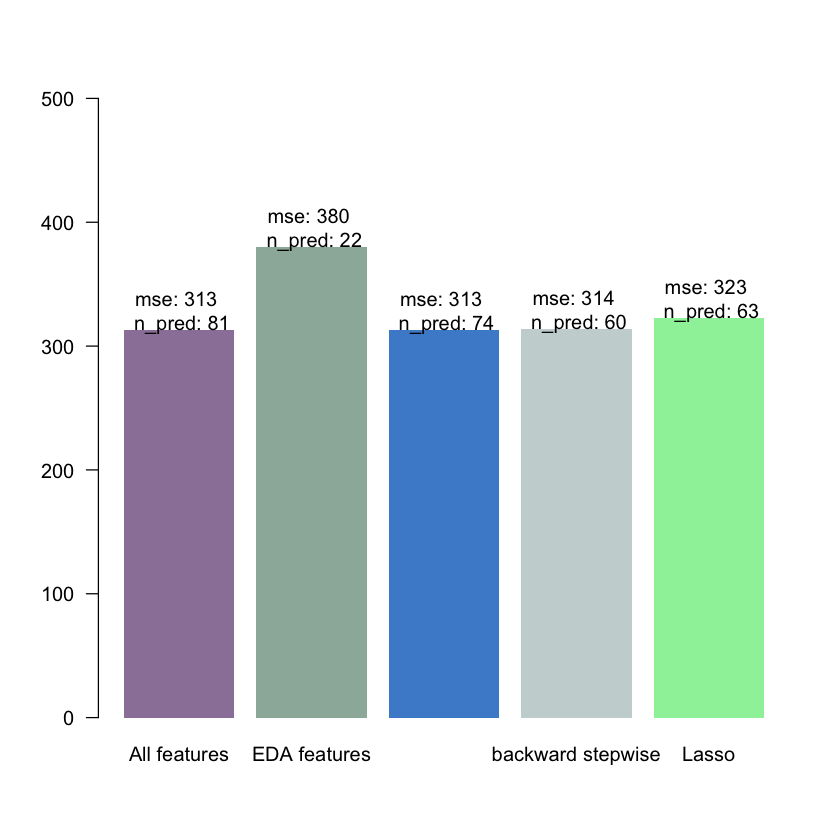

In [75]:
my_bar <- barplot(metrics$mean_square_error , border=F , names.arg=metrics$model , 
                  las=1, 
                  col=c(rgb(0.3,0.1,0.4,0.6) , rgb(0.3,0.5,0.4,0.6) , rgb(0.2,0.5,0.8,0.9),rgb(0.2,0.4,0.4,0.3) ,  rgb(0.3,0.9,0.4,0.6)) , 
                  ylim=c(0,500) , 
                   )

text(my_bar, metrics$mean_square_error+16, paste("mse:", round(metrics$mean_square_error),"\n","n_pred:",metrics$Number_of_features) ,cex=1) 

From the above plot and the `metrics` dataframe we can see that models that we created using the stepwise forward and backward show significant results after reducing the number of predictors.<br>
Stepwise backward feature selection worked well in selecting the features. The mean square error, AIC and also adjusted R-Square values for stepwise backward selection model is very much close to the model which we created by considering all features.

## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

As mentioned earlier the features selected from the stepwise backward propagation are less that total features and mean square error also varying very little. So I consider the subset features which have been choosen in the backward propagation are the best feature subset. The best metrics to compare models is AIC and Adjusted R-square because they into account the model complexcity as well.

Out of all above models we see that the model with less number of features (simple model) with the less AIC value is the backward stepwise model. So now lets do the anova test for this model to check how each feature selected varies that values.

In [76]:
fit_bwd_anova_result <- data.frame(anova(fit_bwd))

In [77]:
fit_bwd_anova_result <-fit_bwd_anova_result[order(fit_bwd_anova_result$Pr..F.),]
fit_bwd_anova_result

,Df,Sum.Sq,Mean.Sq,F.value,Pr..F.
number_of_elements,1,7221387.16,7221387.16,23294.5587,0.000000e+00
wtd_gmean_fie,1,659233.36,659233.36,2126.5375,0.000000e+00
wtd_gmean_atomic_radius,1,752673.39,752673.39,2427.9538,0.000000e+00
std_atomic_radius,1,593180.91,593180.91,1913.4672,0.000000e+00
gmean_fie,1,418251.86,418251.86,1349.1857,2.869801e-284
wtd_mean_atomic_mass,1,414504.82,414504.82,1337.0986,7.791376e-282
wtd_entropy_Density,1,405818.43,405818.43,1309.0783,3.465974e-276
std_atomic_mass,1,358217.84,358217.84,1155.5296,4.446191e-245
wtd_gmean_ThermalConductivity,1,345148.40,345148.40,1113.3705,1.721668e-236
range_fie,1,249530.27,249530.27,804.9281,4.945635e-173


In the above output we have displayed each feature according to their significance level. Out of all features you can see the `gmean_fie` is the most significant and important feature

## 6. Conclusion <a class="anchor" id="sec_6"></a>

Upon doing all the analysis above we have come to a conclusion that the **model which has been created with features selected in `stepwise backward`** performs very well in the goodness of fit w.r.t to model complexcity

`fit_bwd` is the linear model of stepwise backward selection

`reduced_bwd` are the predicted values on testing data

`stepbwd_features_mse` is the mean square error

`reduced_bwd_aic` is the AIC value

`stepbwd_features_mse` features that were selected in stepwise backward

The work described in this notebook is to perform EDA and build different models and compare these models for a better model which can predict the critical_temp based on the features of the super conductors in the given data.<br>
<font color='#4171CA'>
- At the begining we have done the exploratory data analysis to study the different properties of a super conductor and also a study on the correlation with the critical_temp for better intution, which further helps in selecting the subset features.  <br>
- The subset feautures for the model building are considered based on the following conditions such as : Considering the features which are having the corelation between the features and the target variable, and also reducing the number of features if the features are having multicolinearity.<br>
- In the section of model building we have created different linear models with different subsets we have :
 1. model with all the features.
 2. model with all the features selected from the exploratory data analysis.<br>
 3. model based on the features selected based on the forward selection, resulted in 74 features.<br>
 4. model based on the features seleected based on the backward selection, resulted in 60 features.<br>
 5. A shrinkage model i.e lasso regression which is based on the $L_1$ regularization term, where it reduces the coeff of the features which dosen't much contribute to the target variable.<br>
- In the next section `Model comparision` we have compared the different models which are built in the previous section of this notebook.<br>
 1. we have compared the models based on the different metrics based on the test data such as the MSE, AIC, Adjusted_R2 error to determine the most suitable models to predict the temperature of the super conductor.<br>
 2. The ANOVA test is used to determine that models are similar or not.<br>
- Later we have done the Variable Selection and explanation of the features selected by the model which we have built in the model building section.<br>
- we are able to determine that the mean square error value is 314 and also simpler model when compared to other models.<br></font>

This has a less mean square error value **314** and also simpler model when compared to others

## 7. References <a class="anchor" id="sec_7"></a>

The following links have been referred:

"Background information about superconductors:" https://www.technologyreview.com/s/612559/the-record-for-high-temperature-superconductivity-has-been-smashed-again/

"Feature selection through regsubsets:" https://rpubs.com/davoodastaraky/subset

"Comparing the metrics:" https://www.chegg.com/tutors/Statistics-questions/1-What-are-the-adjusted-R-squared-AIC-and-BIC-metrics-How-can-we-use-these-metrics-in-the-modeling-process-and-what-advantage-do-they-have-over-the-R-squared-metric-2-Consider-the-automated-variable-selection-procedures-of-forward-backward-and-stepwise-v--CA1K6/

"A kaggle informative link for features extraction and selection:" https://www.kaggle.com/reisel/how-to-handle-correlated-features#targetText=For%20example%2C%20if%20feature%20A,after%20the%20removal%20of%20features.

"Feature Engineering:" https://towardsdatascience.com/getting-data-ready-for-modelling-feature-engineering-feature-selection-dimension-reduction-39dfa267b95a